In [6]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_profiling import ProfileReport
import requests
import urllib.parse
import folium
import json
from datetime import datetime
sns.set()

#  Scraper packages
import requests 
from bs4 import BeautifulSoup
import csv 
from selenium import webdriver
import time
import sys
import os
import argparse
import string
import pickle5 as pickle

In [7]:
reviews = pd.read_csv('Data/all_reviews.csv')
reviews['ratingDate'] = reviews['ratingDate'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating
0,Maple Casual Dining,918emmaf,2020-12-05,Exquisite,We visited Maple in Friday night and had a won...,5
1,Maple Casual Dining,hildurj2016,2020-11-19,Perfect wedding dinner,"Excellent food, drinks and service!! Me and my...",5
2,Maple Casual Dining,Judy B,2020-10-27,Beautifully Presented Food,I visited this restaurant on my first ever vis...,5
3,Maple Casual Dining,EldBjoern,2020-10-18,Very good food and very pleasant people,We ate dinner in their restaurant. The waiter ...,5
4,Maple Casual Dining,MacondoExpresss,2020-10-13,A lovely birthday dinner,Visited as a couple to celebrate my birthday. ...,5


In [4]:
path_to_protocol5 = "Data/restaurants.pkl"
with open(path_to_protocol5, "rb") as fh:
    data = pickle.load(fh)

data.to_pickle("Data/restaurants2.pkl")

In [8]:
file_name = "Data/restaurants2.pkl"
restaurants = pd.read_pickle(file_name)
restaurants.head()

,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,2.5,"[International, European, Vegetarian Friendly]","[#1 of 95 International in Copenhagen, #1 of 1...","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6729579,12.5581383,"Maple Casual Dining, Vesterbrogade, Kødbyen, V..."
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,4.0,"[Asian, Thai, Vegetarian Friendly]","[#2 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.68395,12.571327,"Keyser Social, Frederiksborggade, Frederikssta..."
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",4.0,"[European, Scandinavian, Danish]","[#2 of 840 European in Copenhagen, #3 of 1,971...","[(Food, 5.0), (Service, 5.0), (Value, 4.5), (A...",55.678704,12.569991,"17, Studiestræde, Vesterbro, København, Københ..."
3,The Olive Kitchen & Bar,"Noerregade 22, Copenhagen 1165 Denmark",5.0,"2,413",2.5,"[International, European, Gluten Free Options]","[#4 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.681248,12.571325,"22, Nørregade, Vesterbro, København, København..."
4,Ark,"Noerre Farimagsgade 63, Copenhagen 1364 Denmark",5.0,277,2.5,"[European, Contemporary, Healthy]","[#5 of 840 European in Copenhagen, #5 of 1,971...","[(Food, 4.5), (Service, 5.0), (Value, 4.5)]",55.6852506,12.5683629,"Ark, Nørre Farimagsgade, Frederiksstaden, Købe..."


In [10]:
restaurants.iloc[0].all_ranks

['#1 of 95 International in Copenhagen',
 '#1 of 1,971 Restaurants in Copenhagen']

In [215]:
temp = restaurants.iloc[:3]
temp['test'] = [x.split() for ]

,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,2.5,"[International, European, Vegetarian Friendly]","[#1 of 95 International in Copenhagen, #1 of 1...","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6729579,12.5581383,"Maple Casual Dining, Vesterbrogade, Kødbyen, V..."
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,4.0,"[Asian, Thai, Vegetarian Friendly]","[#2 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.68395,12.571327,"Keyser Social, Frederiksborggade, Frederikssta..."
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",4.0,"[European, Scandinavian, Danish]","[#2 of 840 European in Copenhagen, #3 of 1,971...","[(Food, 5.0), (Service, 5.0), (Value, 4.5), (A...",55.678704,12.569991,"17, Studiestræde, Vesterbro, København, Københ..."


In [217]:
top10 = list(restaurants[:10].storeName)

['Maple Casual Dining',
 'Keyser Social',
 'Restaurant Krebsegaarden',
 'The Olive Kitchen & Bar',
 'Ark',
 'Madbaren Marmorkirken',
 'Smagsloeget (Vesterbro)',
 'The Shrimp',
 'The Midwestern Diner',
 'Zahida']

In [11]:
file_name = "Data/all_reviewer_info.csv"

In [25]:
reviewer_info = pd.read_csv(file_name, converters={'followers':ast.literal_eval, 'following': ast.literal_eval})
reviewer_info.head()

,username,location,joined,nrContributions,nrReviews,nrUpvotes,nrFollowers,followers,nrFollowing,following
0,AriShine,NaN,Joined in Sep 2016,451,209,49,0,[],0,[]
1,psh70,"Dublin, Ireland",Joined in Jun 2016,21,21,10,0,[],0,[]
2,laorenjia,"Hong Kong, China",Joined in Jun 2016,93,58,60,0,[],0,[]
3,BurdBains,"Berlin, Germany",Joined in Sep 2014,5,5,2,0,[],0,[]
4,bj_rnb420,"Paris, France",Joined in May 2013,39,28,9,1,[MrFizz],0,[]


In [27]:
len(reviewer_info)

30236

In [51]:
reviewer_info_con = reviewer_info[(reviewer_info.followers.map(lambda d: len(d)) > 0) & (reviewer_info.following.map(lambda d: len(d)) > 0)]
reviewer_info_con.head()

,username,location,joined,nrContributions,nrReviews,nrUpvotes,nrFollowers,followers,nrFollowing,following
8,rockyala,"Dublin, Ireland",Joined in Jun 2013,432,311,152,4,"[Srilanka_Travel, feastandtravel, tanzaniafocu...",2,"[ringtravel_al, Reagan10]"
9,musicfoodtravellove,"Orlando, Florida",Joined in Nov 2015,19,7,3,1,[BradleyFL],3,"[734patriciap, BradleyFL, kristenkiss]"
50,JoaoCoruche,"Cascais, Portugal",Joined in Oct 2007,89,79,42,2,"[JoseBranco0001, moulesporto]",7,"[joaoPC-Cascais, JoseBranco0001, eduardof221, ..."
78,Implantmaker,"Bjorkelangen, Norway",Joined in Jun 2007,82,34,20,1,[GudbrandT],1,[kair705]
106,Andreassn,"Hong Kong, China",Joined in Oct 2008,109,107,75,1,[johannahellstrom63],3,"[johannahellstrom63, 948mikaelm, lindagM555WX]"


In [55]:
import networkx as nx

G = nx.DiGraph()

for index, row in reviewer_info_con.iterrows():
    node = row.username
    
    # Add in degrees to node
    for follower in row.followers:
        G.add_edge(follower, node)
    
    # Add out degrees from node
    for following in row.following:
        G.add_edge(node, following)
        

In [60]:
from fa2 import ForceAtlas2

In [61]:
# Getting the ForceAtlas algorithm configuration ready

forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution = False, # Dissuade hubs
    edgeWeightInfluence=1,
    
    # Performance
    jitterTolerance=0.2, # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=0.6,
    
    # Tuning
    scalingRatio=5,
    strongGravityMode=True,
    gravity=1.0,
    
    # Log
    verbose=False
)

# For plotting in- and out-degree distributions. 

def display_histogram_and_loglog_distributions(G_type, print_str, title, bins):
    # Function that displays histogram and log-log of network side-by-side.
    # Takes in network type, print string, title, and number of bins for histogram
    # Typically gets (G.in_degree() or G.out_degree())
    
    degs = [deg for (node, deg) in G_type]
    hist, bin_edges = np.histogram(degs, bins=bins)
    degree_sequence = sorted([d for n, d in G_type], reverse=True)
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, axs = plt.subplots(1, 2,figsize=(15,5)) # Side-by-side comparison
    fig.suptitle(title, size=18)
    
    axs[0].hist(degs, bin_edges) # Histogram plot
    axs[0].set(ylabel='Frequency', xlabel='Degree')
    axs[0].set_title('Histogram of the {} distribution'.format(print_str)) # Setting a dynamic title    
    axs[1].loglog(bin_edges[:-1], hist, 'bo', markersize=4) # Log-log plot
    axs[1].set_title('Log-log of the {} distribution'.format(print_str))
    axs[1].set(ylabel='Frequency', xlabel='Degree');
    
    plt.show()
    
def make_scatter_plots(G, with_percentiles = False, equalize_y_axis = False):
    # A function that makes side-by-side scatterplots of in-degree and out-degree distributions
    # Takes in Network and two booleans, self-explanatory
    
    node_indices = [i for i in range(len(G.nodes))] # indices
    nodes = [node for node in G.nodes] # all nodes in network

    in_degrees = [G.in_degree(node) for node in nodes] # All in-degree values
    out_degrees = [G.out_degree(node) for node in nodes] # All out-degree values
    
    all_degrees = in_degrees + out_degrees # All degrees to find max
    
    y_axis_max = max(all_degrees) # For y axis equalization
    
    fig, axs = plt.subplots(1, 2,figsize=(15,5)) 
    
    axs[0].scatter(node_indices, in_degrees, s=2) # In-degree scatter
    axs[0].set_xlabel('Network nodes (no particular order)')
    axs[0].set_ylabel('In degree')
    axs[0].set_title('In-degree scatter plot of the network')
    if(equalize_y_axis):
        axs[0].set_ylim(0, y_axis_max)
    
    axs[1].scatter(node_indices, out_degrees, s=2) # Out-degree scatter
    axs[1].set_xlabel('Network nodes (no particular order)')
    axs[1].set_ylabel('Out degree')
    axs[1].set_title('Out-degree scatter plot of the network')
    if(equalize_y_axis):
        axs[1].set_ylim(0, y_axis_max)

    if with_percentiles:
        # If percentile lines were requested
        
        percentiles = [95, 99, 99.7] # Defining three high percentiles to explore

        colours = ["#264653", "#e9c46a", "#e76f51"] # And their colours
        
        # Drawing line for each percentile on each graph
        for i in range(len(percentiles)):    
            axs[0].axhline(y=np.percentile(in_degrees, percentiles[i]), c=colours[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")
            axs[1].axhline(y=np.percentile(out_degrees, percentiles[i]), c=colours[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")
            axs[0].legend()
            axs[1].legend()

    return axs

def plot_scatter_with_labels_over_percentile(degs, print_str, title, percentile):
    fig=plt.figure(figsize=(8,5))
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(node_indices, degs, s=[degree / 25 for degree in degs], c=degs, cmap="Blues") # Size map included
    ax.set_xlabel('Network nodes (random order)')
    ax.set_ylabel(print_str)
    #ax.set_ylabel('In degree')
    ax.set_title(title)
    #ax.set_title('In-degree scatter plot of the network (over 99.7th percentile)')

    # Adding the horizontal line for the 99.7th percentile
    plt.axhline(y=np.percentile(degs, percentile), xmin=0, xmax=1, alpha=0.7, label="{}th pct".format(percentile))   

    # And annotating the top degrees
    for n in range(len(degs)):
        if degs[n] > np.percentile(degs, percentile):
            plt.text(n+10, degs[n], nodes[n], fontsize=9)
    
    plt.legend()        
    plt.show()

In [62]:
# Getting positions for the network nodes

positions = forceatlas2.forceatlas2_networkx_layout(G, 
                                                    pos=None, 
                                                    iterations=2000);

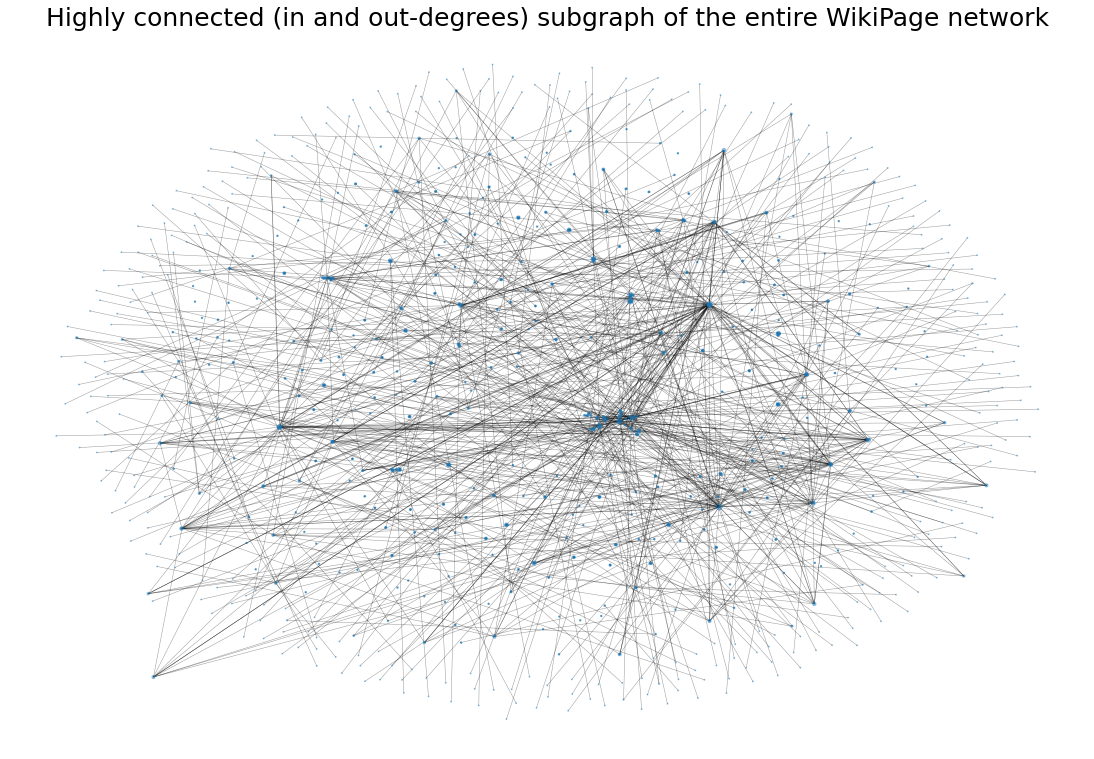

In [63]:
# Determining node sizes: 
node_sizes = [val*1500 for val in nx.degree_centrality(G).values()] 

# And we're ready to visualise:

plt.figure(figsize=(15,10))

nx.draw(nx.to_undirected(G), 
        positions, 
        with_labels = False, 
        node_size = node_sizes, 
        width=0.5, 
        alpha=0.4);

plt.title("Highly connected (in and out-degrees) subgraph of the entire WikiPage network", fontsize=25, ha='center')
plt.show()

In [65]:
from collections import Counter

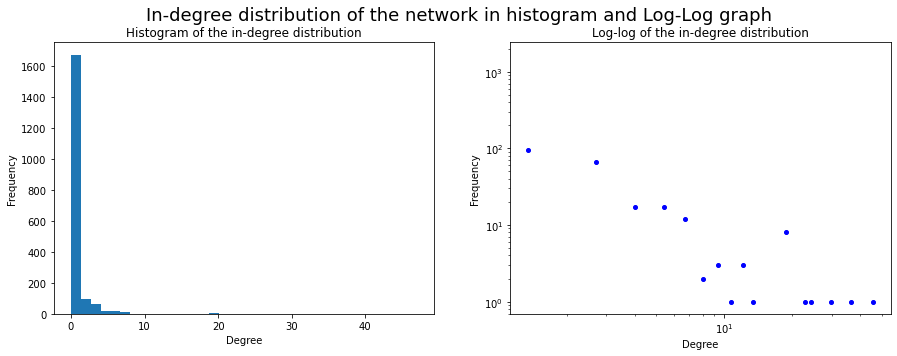

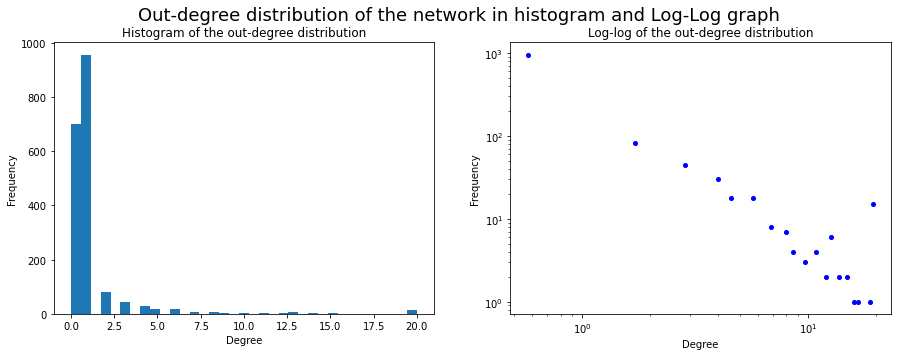

In [66]:
# Calling the predefined distribution visualisation functions

display_histogram_and_loglog_distributions(G_type=G.in_degree(), #Plotting the in-degree distribution
                                           bins=35, 
                                           print_str="in-degree", 
                                           title="In-degree distribution of the network in histogram and Log-Log graph")

display_histogram_and_loglog_distributions(G_type=G.out_degree(), # Plotting the out-degree distribution
                                           bins=35, 
                                           print_str="out-degree", 
                                           title="Out-degree distribution of the network in histogram and Log-Log graph")


In [71]:
import random
import seaborn as sns

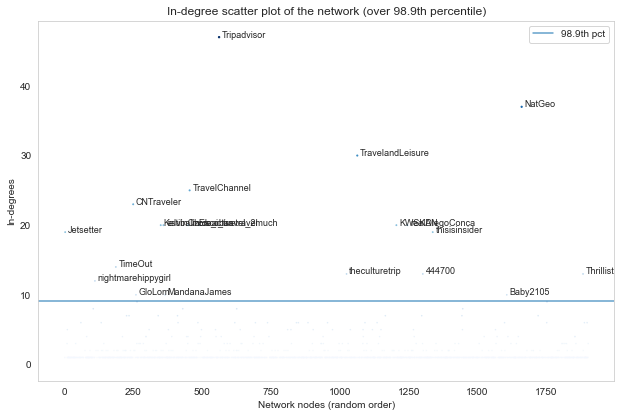

In [72]:
# Checking the highest in-degree nodes in the whole network

sns.set_style("whitegrid", {'axes.grid' : False})

nodes = [node for node in G.nodes] # for this we need all nodes in network
node_indices = [i for i in range(len(G.nodes))] # indices

random.shuffle(nodes) # randomising the list for ordering (with same seed)

in_degrees = [G.in_degree(node) for node in nodes] # All in-degree values
out_degrees = [G.out_degree(node) for node in nodes] # All out-degree values

plot_scatter_with_labels_over_percentile(in_degrees, 
                                         "In-degrees", # Axis string
                                         "In-degree scatter plot of the network (over 98.9th percentile)", # Plot title 
                                         98.9 # percentile
                                         )

plt.show()

In [246]:
df = reviews.sort_values(by='ratingDate', ascending=True).copy()
df.drop_duplicates(['storeName','reviewerUsername','ratingDate'], inplace=True)
df['month'] = df.ratingDate.dt.month

df.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,month
42706,Teaterkaelderen,tinras79,2007-12-28,"Great atmosphere, but a...","Great atmosphere, but a little expensive compa...",3,12
56866,Zirup,Charlotta A,2007-12-30,The brunch!!! The pretty...,The brunch!!! The pretty crowd!,4,12
68217,Cafe Bopa,Charlotta A,2007-12-30,Go in the summer and sit...,Go in the summer and sit outside.,3,12
83144,Laundromat Cafe,JosephineKCopenhagen,2008-01-11,Good brunch!,Good brunch!,3,1
60077,Fu Hao,BBB73,2008-01-20,God dim sum!,God dim sum!,4,1


In [396]:
df['review_count'] = df.groupby('storeName')['reviewerUsername'].transform('count')
df_high = df[df.review_count >= 750].copy()
len(df_high.storeName.unique())

8

In [397]:
# temp = df[df.storeName == 'Restaurant Zeleste'].copy()
# temp.head()
df_high['month_avg'] = df_high.groupby([df_high.ratingDate.dt.year, df_high.month])['rating'].transform(np.mean)
df_high.sort_values(by=['ratingDate'], inplace=True)
df_high['current_mean'] = df_high.groupby('storeName')['rating'].apply(lambda x: x.expanding().mean())
df_high['rolling'] = df_high.groupby('storeName')['rating'].apply(lambda x: x.rolling(window=50, min_periods=1).mean())
df_high = df_high.reset_index(drop=True)
df_high.head(10)

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,month,review_count,month_avg,current_mean,rolling
0,Restaurant Krebsegaarden,FCBCph,2008-08-09,Food and art hand in hand,"Outstanding food, attentive service and an atm...",5,8,838,4.500000,5.000000,5.000000
1,Frk. Barners Kaelder,hacoulson,2008-08-30,Very much worth a visit,"Close to the main railway station Frk Barners,...",4,8,760,4.500000,4.000000,4.000000
2,RizRaz,stefacope,2008-11-26,Extremely unfriendly staff,"Living in Copenhagen, I have been eating at Ri...",1,11,816,1.000000,1.000000,1.000000
3,Restaurant Krebsegaarden,markusch,2008-12-23,Our favourite restaurant in Copenhagen.,We are frequently visiting Copenhagen and try ...,5,12,838,5.000000,5.000000,5.000000
4,Restaurant Puk,MelanieSpain,2009-01-02,Excellent traditional food in a cozy location,This restaurant was recommended to us by some ...,5,1,875,5.000000,5.000000,5.000000
5,Restaurant Krebsegaarden,pushen,2009-01-06,A different experience,"I have only been there a few times, but every ...",5,1,838,5.000000,5.000000,5.000000
6,Restaurant Krebsegaarden,Dyova,2009-04-25,"Unpretentious, sophisticated, delicious","This is a fantastic find, on a fairly quiet st...",4,4,838,4.000000,4.750000,4.750000
7,Restaurant Krebsegaarden,Hilde_J,2009-06-11,Exquisite.,The first time I ate here was with a French gu...,5,6,838,4.333333,4.800000,4.800000
8,Restaurant Krebsegaarden,BellGray,2009-06-14,"Great food, great people, great find",Visiting friends found Krebsegaarden on TripAd...,5,6,838,4.333333,4.833333,4.833333
9,Frk. Barners Kaelder,pambill2016,2009-06-17,Authentic,A good reasonably priced restaurant (by Danish...,4,6,760,4.333333,4.000000,4.000000


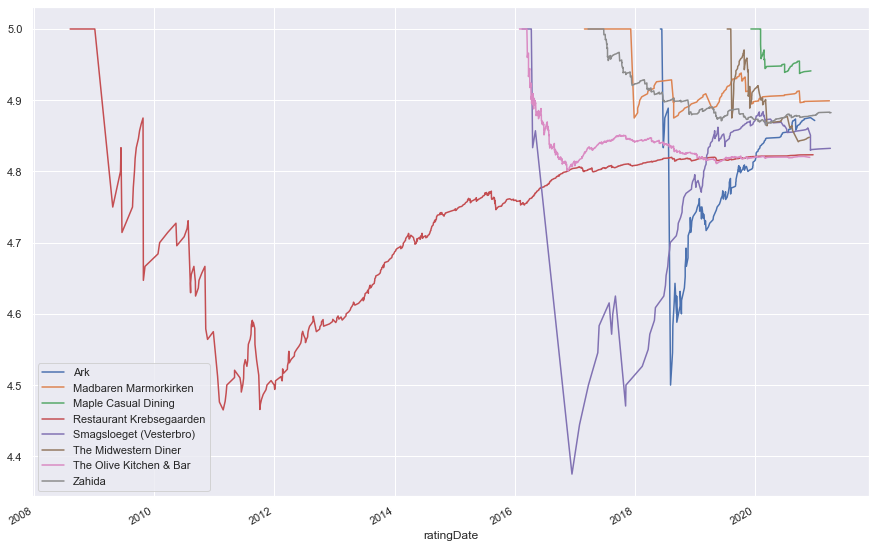

In [395]:
fig, ax = plt.subplots(figsize=(15,10))

nr_store = len(list(df_high.storeName.unique()))


df_top10 = df_high[df_high.storeName.isin(top10)]

for key, grp in df_top10.groupby(['storeName']):
    ax = grp.plot(ax=ax,kind='line', x='ratingDate', y='current_mean', label=key)

# plt.legend(loc='best')
plt.show()

In [245]:
df_high[df_high.storeName == "Zirup"][:10]

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,month,review_count,month_avg,current_mean,rolling_
0,Zirup,Charlotta A,2007-12-30,The brunch!!! The pretty...,The brunch!!! The pretty crowd!,4,12,124,4.000000,4.000000,4.000000
467,Zirup,corrineandmathew,2010-11-28,Cozy cafe with great food,We went there with my team from work. We got a...,5,11,124,3.843750,4.500000,4.500000
1344,Zirup,lamericanina,2011-11-21,Trendy But Welcoming Atmosphere,While in town for the weekend to visit two Swe...,4,11,124,4.000000,4.333333,4.333333
1405,Zirup,Crispymaster,2011-12-05,Best burger by far,"Had lunch here on Sunday, excellent atmosphere...",5,12,124,4.007576,4.500000,4.500000
1731,Zirup,mikkelholm,2012-01-30,Decent cafe in Strædet,This is cafe so set your expectations after th...,3,1,124,3.903670,4.200000,4.200000
2349,Zirup,rivbom,2012-05-14,"Great food and drink, good atmosphere, worth a...",We stopped for a beer here purely by chance be...,4,5,124,3.864542,4.166667,4.200000
2404,Zirup,jhaaja,2012-05-20,Nice atmosphere and tasty food,We stopped by Zirup after spending most of the...,4,5,124,3.864542,4.142857,4.000000
2492,Zirup,Moshe L,2012-05-30,Brunch!,"What a great spot for Sunday brunch, they tend...",4,5,124,3.864542,4.125000,4.000000
2927,Zirup,Passenger802895,2012-07-13,"Excellent food, slow service",On a saturday evening out in Copenhagen it was...,3,7,124,3.936747,4.000000,3.600000
2977,Zirup,raemondodo,2012-07-18,Lots of food but poor service,Massive portions but had real trouble getting ...,3,7,124,3.936747,3.900000,3.600000


<AxesSubplot:xlabel='ratingDate'>

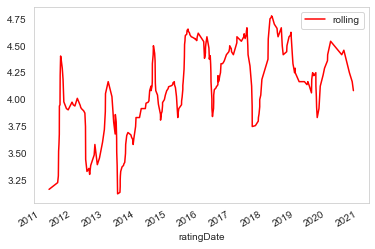

In [192]:
import matplotlib.pyplot as plt


for store in list(df_high.storeName.unique()):
    temp['rolling'] = temp.rolling(window=12)['month_avg'].mean()
    ax = plt.gca()
    temp.plot(kind='line',x='ratingDate',y='rolling', color='red', ax=ax)


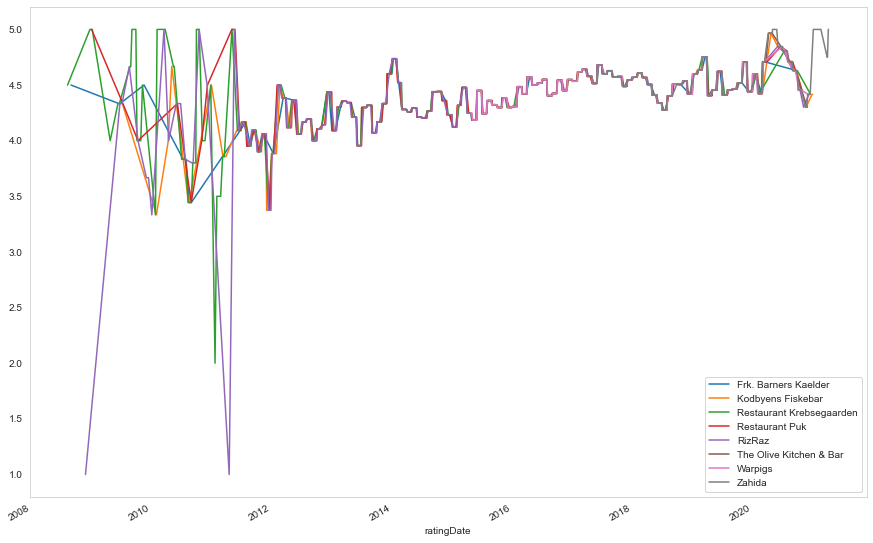

In [225]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,10))

nr_store = len(list(df_high.storeName.unique()))

for key, grp in df_high.groupby(['storeName']):
    ax = grp.plot(ax=ax,kind='line', x='ratingDate', y='month_avg', label=key)

plt.legend(loc='best')
plt.show()

In [222]:
for key, grp in df_high.groupby(['storeName']):
    print(grp.iloc[:2])
    print('TESTING')

              storeName reviewerUsername ratingDate             reviewHeader  \
1  Frk. Barners Kaelder        hacoulson 2008-08-30  Very much worth a visit   
9  Frk. Barners Kaelder      pambill2016 2009-06-17                Authentic   

                                          reviewText  rating  month  \
1  Close to the main railway station Frk Barners,...       4      8   
9  A good reasonably priced restaurant (by Danish...       4      6   

   review_count  month_avg  
1           760   4.500000  
9           760   4.333333  
TESTING
            storeName reviewerUsername ratingDate  \
14  Kodbyens Fiskebar          Debra Z 2009-07-08   
36  Kodbyens Fiskebar         jlmassot 2010-01-31   

                                         reviewHeader  \
14  Amazing seafood, beautifully prepared and pres...   
36  A 35 kr kebab restaurant has a better service ...   

                                           reviewText  rating  month  \
14  We ate here June 26 so the restaurant was 

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

for store in top10:
    temp = df_high[df_high]

In [ ]:
connections = {}


restaurant_list =  list(df.storeName.unique())
for restaurant in restaurant_list:
    r_temp = df[df.storeName == restaurant]
    for user in r_temp:
        if user in connection:
            
    

In [148]:
df.drop_duplicates(subset=['storeName','ratingDate'])

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating
42706,Teaterkaelderen,tinras79,2007-12-28,"Great atmosphere, but a...","Great atmosphere, but a little expensive compa...",3
56866,Zirup,Charlotta A,2007-12-30,The brunch!!! The pretty...,The brunch!!! The pretty crowd!,4
68217,Cafe Bopa,Charlotta A,2007-12-30,Go in the summer and sit...,Go in the summer and sit outside.,3
83144,Laundromat Cafe,JosephineKCopenhagen,2008-01-11,Good brunch!,Good brunch!,3
60077,Fu Hao,BBB73,2008-01-20,God dim sum!,God dim sum!,4
...,...,...,...,...,...,...
47178,Mæsk Diner,karinkU514JU,2021-04-26,Jeg har bestilt take away,Jeg har bestilt take away\nFlere gange hos dem...,5
60486,Poco Picante,567zakis,2021-04-26,A good choice for mexican food in CPH,We were 3 friends who enjoyed the hospitality ...,5
47661,L'Alba Lab - Gastronomia & Vini,Alberto M,2021-04-27,Excellent quality and great service,The place is really cosy and the staff is very...,5
62291,Hija De Sanchez,MortenMarthin,2021-04-27,Tacos that take you back to México,The tacos at this place are a slice of Mexican...,5


When choosing a restaurant to eat at one might have a cuisine, area a certain close proximity in mind. Here we will try to find out if there are differences between neighbourhodds in the Copenhagen area in regards to rating of restaurants. Are some areas more crowded with restaurants or do all the higher rating restaurants tend to be in the same area. Is the evolution of a restaurant's rating something that can add value to our choice, f.x. would we want to go to a restaurant that has had recent problems and bad reviews, even though the overall rating looks good.


Lets start by looking at the distribution of ratings before we look at our spacial data. 

In [316]:
reviews

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,word_count
0,Maple Casual Dining,918emmaf,2020-12-05,Exquisite,We visited Maple in Friday night and had a won...,5,20
1,Maple Casual Dining,hildurj2016,2020-11-19,Perfect wedding dinner,"Excellent food, drinks and service!! Me and my...",5,30
2,Maple Casual Dining,Judy B,2020-10-27,Beautifully Presented Food,I visited this restaurant on my first ever vis...,5,31
3,Maple Casual Dining,EldBjoern,2020-10-18,Very good food and very pleasant people,We ate dinner in their restaurant. The waiter ...,5,35
4,Maple Casual Dining,MacondoExpresss,2020-10-13,A lovely birthday dinner,Visited as a couple to celebrate my birthday. ...,5,26
...,...,...,...,...,...,...,...
109744,Restaurant Sankt Annae,Lizzy R,2011-10-07,Best traditional lunch restaurant in Copenhagen,The best smoerrebroed you can get in town. All...,5,59
109745,Restaurant Sankt Annae,ogneto,2011-09-16,Best Danish food in Copenhague,"Very , very good Danish food . Very fresh prod...",5,21
109746,Restaurant Sankt Annae,Kismet220,2011-07-26,Really lovely lunch spot,My Danish friend wanted us to go and I followe...,4,39
109747,Restaurant Sankt Annae,Makushla-O,2011-05-13,Elegant and stylish place to eat a traditional...,What a surprise. A tiny restaurant with a few ...,5,50


In [ ]:
rating_count = reviews['rating'].value_counts()
word_count = reviews.groupby('rating')['word_count'].agg('mean')

df_plot = pd.concat([rating_count, word_count], axis=1)

df_plot.plot(kind='bar', secondary_y="word_count", rot=0)

# _ = df.plot( kind= 'bar' , secondary_y= 'amount' , rot= 0 )
plt.show()

# fig = plt.figure(figsize=(12,8)) # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes
# lns1 = rating_count.plot(kind='bar', color='red', ax=ax, width=width, position=1, rot=0, label='Rating count')
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
# lns2 = word_count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label='AVG word count')

# width = 0.4

# ax.set_ylabel('Rating')
# ax2.set_ylabel('AVG word count')

# ax.legend();
# ax2.legend(loc=1);

# plt.show()

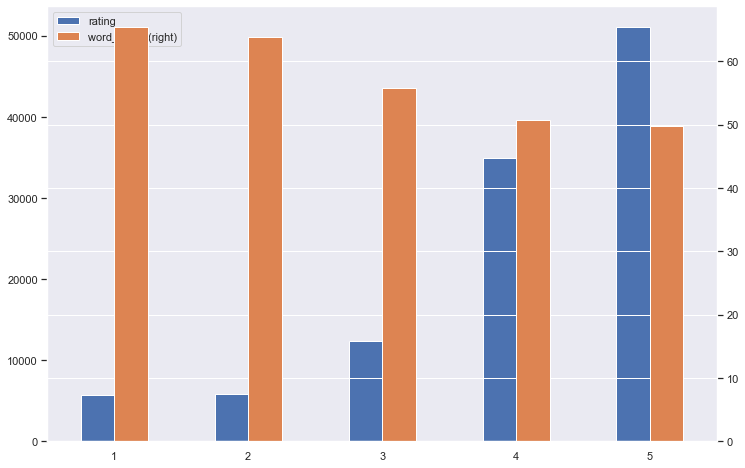

In [315]:
df_plot.plot(kind='bar', secondary_y="word_count", rot=0, figsize=(12,8));

Iterestning to see that bad reviews tend to have longer text, this could be do to the fact that people simply go on a rant to tell how bad a restaurant was.

In [372]:
restaurants = restaurants.dropna(how = "any", subset=['avgRating','lat','lon'])
restaurants['lat_lon'] = list(zip(restaurants.lat, restaurants.lon))
restaurants.head()

,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location,lat_lon
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,2.5,"[International, European, Vegetarian Friendly]","[#1 of 95 International in Copenhagen, #1 of 1...","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6729579,12.5581383,"Maple Casual Dining, Vesterbrogade, Kødbyen, V...","(55.6729579, 12.5581383)"
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,4.0,"[Asian, Thai, Vegetarian Friendly]","[#2 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.68395,12.571327,"Keyser Social, Frederiksborggade, Frederikssta...","(55.68395, 12.571327)"
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",4.0,"[European, Scandinavian, Danish]","[#2 of 840 European in Copenhagen, #3 of 1,971...","[(Food, 5.0), (Service, 5.0), (Value, 4.5), (A...",55.678704,12.569991,"17, Studiestræde, Vesterbro, København, Københ...","(55.678704, 12.569991)"
3,The Olive Kitchen & Bar,"Noerregade 22, Copenhagen 1165 Denmark",5.0,"2,413",2.5,"[International, European, Gluten Free Options]","[#4 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.681248,12.571325,"22, Nørregade, Vesterbro, København, København...","(55.681248, 12.571325)"
4,Ark,"Noerre Farimagsgade 63, Copenhagen 1364 Denmark",5.0,277,2.5,"[European, Contemporary, Healthy]","[#5 of 840 European in Copenhagen, #5 of 1,971...","[(Food, 4.5), (Service, 5.0), (Value, 4.5)]",55.6852506,12.5683629,"Ark, Nørre Farimagsgade, Frederiksstaden, Købe...","(55.6852506, 12.5683629)"


In [374]:
rating_list = []

for x in range(1,6):
    rating_list.append(restaurants[restaurants.avgRating == x]['lat_lon'].tolist())

In [ ]:
map_hooray = folium.Map([lat, lon],
                        tiles = "Stamen Toner",
                        zoom_start=13)

color_map = ['']

for x in range(5):
    
    folium.CircleMarker(coord,radius=1,color='red').add_to(map_hooray)

map_hooray


import branca.colormap as cm

In [388]:
import branca.colormap as cm
m = folium.Map([55.6760968, 12.5683371],
                        tiles = "openstreetmap",
                        zoom_start=12)

# Add color bar
colormap = cm.linear.RdYlGn_04.scale(1, 5).to_step(5)
colormap.caption = "A colormap caption"
m.add_child(colormap)

for x in range(1,6):
    for latlon in rating_list[x-1]:
        try:
            folium.Circle(latlon,radius=50, fill=True,color=colormap(x)).add_to(m)
        except:
            print(latlon)

m

Now lets do this on the true average of the review ratings and not on what is stated in on the restaurants Tripadvisor page. 

In [477]:
true_rating

storeName
1 DUANG JAI - Thai Restaurant    3.800000
1+1 Street Kitchen               5.000000
1001 Nat Pizza                   1.000000
1105 Cocktail Bar                4.204545
13z Cafe & Studio                5.000000
                                   ...   
wokAmok                          2.500000
Ø12 - Coffee & Eatery            5.000000
Østerberg Ice Cream              5.000000
Østergro                         3.666667
à terre                          4.900000
Name: rating, Length: 1998, dtype: float64

In [490]:
true_rating = reviews.groupby('storeName')['rating'].agg('mean')
# restaurants['true_rating'] = [true_rating[x] for x in restaurants.storeName]
restaurants = restaurants.merge(true_rating, left_on='storeName', right_on='storeName')

In [462]:
temp["rank"] = temp.index + 1
temp

/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location,lat_lon,rank
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,2.5,"[International, European, Vegetarian Friendly]","[#1 of 95 International in Copenhagen, #1 of 1...","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6729579,12.5581383,"Maple Casual Dining, Vesterbrogade, Kødbyen, V...","(55.6729579, 12.5581383)",1
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,4.0,"[Asian, Thai, Vegetarian Friendly]","[#2 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.68395,12.571327,"Keyser Social, Frederiksborggade, Frederikssta...","(55.68395, 12.571327)",2
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",4.0,"[European, Scandinavian, Danish]","[#2 of 840 European in Copenhagen, #3 of 1,971...","[(Food, 5.0), (Service, 5.0), (Value, 4.5), (A...",55.678704,12.569991,"17, Studiestræde, Vesterbro, København, Københ...","(55.678704, 12.569991)",3
3,The Olive Kitchen & Bar,"Noerregade 22, Copenhagen 1165 Denmark",5.0,"2,413",2.5,"[International, European, Gluten Free Options]","[#4 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.681248,12.571325,"22, Nørregade, Vesterbro, København, København...","(55.681248, 12.571325)",4
4,Ark,"Noerre Farimagsgade 63, Copenhagen 1364 Denmark",5.0,277,2.5,"[European, Contemporary, Healthy]","[#5 of 840 European in Copenhagen, #5 of 1,971...","[(Food, 4.5), (Service, 5.0), (Value, 4.5)]",55.6852506,12.5683629,"Ark, Nørre Farimagsgade, Frederiksstaden, Købe...","(55.6852506, 12.5683629)",5
5,Madbaren Marmorkirken,"Store Kongensgade 77, Copenhagen 1264 Denmark",5.0,249,1.0,"[Pizza, European, Vegetarian Friendly]","[#6 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.685248,12.5883371,"Madbaren Marmorkirken, Store Kongensgade, Fred...","(55.685248, 12.5883371)",6
6,Smagsloeget (Vesterbro),"Vesterbrogade 19 Kobenhavn V, Copenhagen 1620 ...",5.0,466,1.0,"[Fast Food, International, Fusion]","[#2 of 149 Fast Food in Copenhagen, #7 of 1,97...","[(Food, 5.0), (Service, 4.5), (Value, 4.5)]",55.682131,12.5711248,"Smagsløget, Nørregade, Vesterbro, København, K...","(55.682131, 12.5711248)",7
7,The Shrimp,"Sankt Annae Plads 20, Copenhagen 1250 Denmark",5.0,159,2.5,"[Seafood, International, Vegetarian Friendly]","[#8 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.6812303,12.5916864,"The Shrimp, Sankt Annæ Plads, Frederiksstaden,...","(55.6812303, 12.5916864)",8
8,The Midwestern Diner,"Gyldenloevesgade 4, Copenhagen 1369 Denmark",5.0,210,2.5,"[American, Diner, Vegetarian Friendly]",[],"[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.6801392,12.5634075,"The Midwestern Diner, 4, Gyldenløvesgade, Vest...","(55.6801392, 12.5634075)",9
9,Zahida,"Romersagde 20, Copenhagen 1362 Denmark",5.0,"1,247",2.5,"[Indian, Pakistani, Vegetarian Friendly]",[],"[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6845789,12.5697732,"Zahida, Rømersgade, Frederiksstaden, København...","(55.6845789, 12.5697732)",10
